In [3]:
!git status

On branch master
Your branch is up to date with 'origin/master'.

Changes not staged for commit:
  (use "git add/rm <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   20180914_TD_Python.ipynb
	deleted:    accidents_corporels_de_la_circulation.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	.ipynb_checkpoints/
	Untitled1.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


# Base de données accidents corporels de la circulation
https://www.data.gouv.fr/fr/datasets/base-de-donnees-accidents-corporels-de-la-circulation/

Ce jeu de données provient d'un service public certifié
 NEC MERGITUR
Pour chaque accident corporel (soit un accident survenu sur une voie ouverte à la circulation publique, impliquant au moins un véhicule et ayant fait au moins une victime ayant nécessité des soins), des saisies d’information décrivant l’accident sont effectuées par l’unité des forces de l’ordre (police, gendarmerie, etc.) qui est intervenue sur le lieu de l’accident. Ces saisies sont rassemblées dans une fiche intitulée bulletin d’analyse des accidents corporels. L’ensemble de ces fiches constitue le fichier national des accidents corporels de la circulation dit " Fichier BAAC " administré par l’Observatoire national interministériel de la sécurité routière "ONISR".

Les bases de données, extraites du fichier BAAC, répertorient l'intégralité des accidents corporels de la circulation intervenus durant une année précise en France métropolitaine ainsi que les départements d’Outre-mer (Guadeloupe, Guyane, Martinique, La Réunion et Mayotte depuis 2012) avec une description simplifiée. Cela comprend des informations de localisation de l’accident, telles que renseignées ainsi que des informations concernant les caractéristiques de l’accident et son lieu, les véhicules impliqués et leurs victimes.

Par rapport aux bases de données agrégées 2005-2010 et 2006-2011 actuellement disponibles sur le site www.data.gouv.fr, les bases de données de 2005 à 2016 sont désormais annuelles et composées de 4 fichiers (Caractéristiques – Lieux – Véhicules – Usagers ) au format csv.

Ces bases occultent néanmoins certaines données spécifiques relatives aux usagers et aux véhicules et à leur comportement dans la mesure où la divulgation de ces données porterait atteinte à la protection de la vie privée des personnes physiques aisément identifiables ou ferait apparaître le comportement de telles personnes alors que la divulgation de ce comportement pourrait leur porter préjudice (avis de la CADA – 2 janvier 2012).

In [4]:
%matplotlib inline

In [5]:
import pandas as pd

# Téléchargement de la documentation
https://www.data.gouv.fr/fr/datasets/r/36496bab-a042-47bf-b08b-3c7467f2bddf

# Téléchargements des données
https://www.data.gouv.fr/fr/datasets/r/be2191a6-a7cd-446f-a9fc-8d698688eb9e

https://www.data.gouv.fr/fr/datasets/r/e4c6f4fe-7c68-4a1d-9bb6-b0f1f5d45526

https://www.data.gouv.fr/fr/datasets/r/08b77510-39c4-4761-bf02-19457264790f

https://www.data.gouv.fr/fr/datasets/r/96aadc9f-0b55-4e9a-a70e-c627ed97e6f7


In [6]:
import pandas as pd

In [7]:
types_des_colonnes ={"hrmn" : str }

In [8]:
path = "https://www.data.gouv.fr/fr/datasets/r/96aadc9f-0b55-4e9a-a70e-c627ed97e6f7"
df = pd.read_csv(path, encoding="latin1", dtype=types_des_colonnes)

In [9]:
df.head()

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep
0,201600000001,16,2,1,1445,1,2,1,8,3.0,5,"46, rue Sonneville",M,0.0,0.0,590
1,201600000002,16,3,16,1800,1,2,6,1,6.0,5,1a rue du cimetiÃ¨re,M,0.0,0.0,590
2,201600000003,16,7,13,1900,1,1,1,1,6.0,11,NaN,M,0.0,0.0,590
3,201600000004,16,8,15,1930,2,2,1,7,3.0,477,52 rue victor hugo,M,0.0,0.0,590
4,201600000005,16,12,23,1100,1,2,3,1,3.0,11,rue Joliot curie,M,0.0,0.0,590


In [10]:
df.dtypes

Num_Acc      int64
an           int64
mois         int64
jour         int64
hrmn        object
lum          int64
agg          int64
int          int64
atm          int64
col        float64
com          int64
adr         object
gps         object
lat        float64
long       float64
dep          int64
dtype: object

In [13]:
def make_string_4_car(string):
    while len(string)<4:
        string = "0" + string
    return string

In [14]:
def test_make_string_4_car():
    
    function = make_string_4_car
    input_ = "4"
    expected_output = "0004"
    assert(function(input_) == expected_output)
    
    input_ = "0004"
    expected_output = "0004"
    assert(function(input_) == expected_output)
    
test_make_string_4_car()

In [20]:
df.hrmn = df.hrmn.map(make_string_4_car)

# Matplotlib : la librairie standard est originale de python

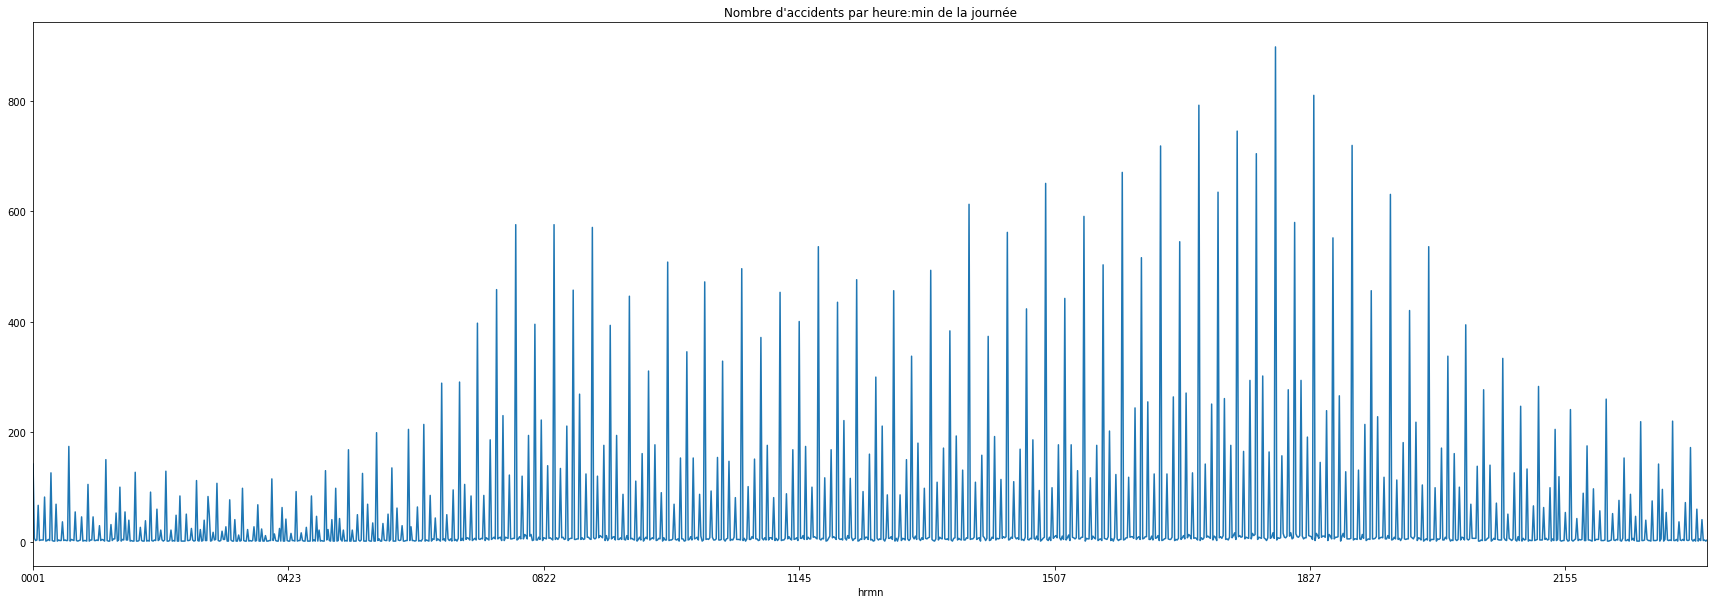

In [40]:
title = "Nombre d'accidents par heure:min de la journée"
_ = df.groupby("hrmn")["Num_Acc"].count()
_.plot(title=title, figsize=(30,10))

# Syntaxe d'extraction d'élèments en fin ou début de tableau => [:]

In [53]:

"ceci est un tableau de caractères"[-2:]
"ceci est un tableau de caractères"[:-2]


'ceci est un tableau de caractèr'

In [56]:
df["is_in_quart_d_heure"] = df.hrmn.map(lambda x: x[-2:] in ["00", "15", "30", "45"])

In [57]:
df.is_in_quart_d_heure.sum()

33916

# Bokeh : la nouvelle librairie d'analyse de données

In [58]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [70]:
_ = df.groupby("hrmn")["Num_Acc"].count()
_2 = _.reset_index()

In [72]:

tooltips = [
    ("(x,y)", "($x, $y)")] 
p=figure(tooltips=tooltips)

In [73]:
p.scatter(x=_2.hrmn.map(int), y=_2.Num_Acc)
show(p)

# 1) Modification des noms de colonnes

In [113]:
df.columns

Index(['Num_Acc', 'an', 'mois', 'jour', 'hrmn', 'lum', 'agg', 'int', 'atm',
       'col', 'com', 'adr', 'gps', 'lat', 'long', 'dep'],
      dtype='object')

## 1.1) méthode 1

In [ ]:
nouvelles_colonnes = ["Num_Acc", "an", "mois", "jour", "hrmn", 
                      "lumiere", "agglomeration", "intersection", 
                      "meteo", 'collision', 'num_commune', 'adr', 
                      'gps', 'lat', 'long', 'dep']

In [119]:
df.columns = nouvelles_colonnes

In [120]:
df.sample().T

,35455
Num_Acc,201600035456
an,16
mois,12
jour,21
hrmn,1620
lumiere,1
agglomeration,2
intersection,1
meteo,1
collision,3


In [151]:
!git add 20180914_TD_Python.ipynb
!git commit -m "next"
!git push origin

[master 212a900] next
 1 file changed, 57 insertions(+), 58 deletions(-)
Counting objects: 3, done.
Delta compression using up to 8 threads.
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 714 bytes | 714.00 KiB/s, done.
Total 3 (delta 2), reused 0 (delta 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/romainjouin/formation_python
   6522daa..212a900  master -> master


## 1.1) méthode 2

In [125]:
colonnes_a_changer = {"lat" :"lattitude", "long" : "longitude"}
df.rename(columns=colonnes_a_changer, inplace=True)

# 2) analyse

In [133]:
# les num acc sont ils uniques ? 
df.Num_Acc.is_unique()

True

In [152]:
# nombre d'accidents par typologie meteo
df.groupby("meteo")["Num_Acc"].count().sort_values()

meteo
6      144
4      159
9      300
5      621
7      667
3     1422
8     1640
2     6582
1    47897
Name: Num_Acc, dtype: int64

# 2.1) passer de catégories chiffrées à des labels

In [164]:
label_meteo = {
1 : "Normale",
2 : "Pluie légère",
3 : "Pluie forte",
4 : "Neige - grêle",
5 : "Brouillard - fumée",
6 : "Vent fort - tempête",
7 : "Temps éblouissant",
8 : "Temps couvert",
9 : "Autre",}

In [165]:
label_meteo

{1: 'Normale',
 2: 'Pluie légère',
 3: 'Pluie forte',
 4: 'Neige - grêle',
 5: 'Brouillard - fumée',
 6: 'Vent fort - tempête',
 7: 'Temps éblouissant',
 8: 'Temps couvert',
 9: 'Autre'}

In [158]:
df["label_meteo"] = df.meteo.map(label_meteo)

In [167]:
df.sample(3).T

,21216,39790,39433
Num_Acc,201600021217,201600039791,201600039434
an,16,16,16
mois,10,9,3
jour,15,5,15
hrmn,1915,1450,1345
lumiere,3,1,1
agglomeration,1,2,2
intersection,1,6,2
meteo,1,2,1
collision,1,3,3


In [169]:
#compter le nombdre d'accident par type de label météo
df.groupby("label_meteo")["Num_Acc"].count().sort_values()

label_meteo
Vent fort - tempête      144
Neige - grêle            159
Autre                    300
Brouillard - fumée       621
Temps éblouissant        667
Pluie forte             1422
Temps couvert           1640
Pluie légère            6582
Normale                47897
Name: Num_Acc, dtype: int64

In [170]:
# nombre d'accidents ? 
df.Num_Acc.count()

59432

In [173]:
#nombre d'accidents par heure de la journee

len(df.hrmn.unique())

1312

In [174]:
nb_de_minutes_par_jour = 60 * 24
nb_de_minutes_par_jour

1440

In [176]:

_ = df.groupby("hrmn")

In [177]:
_["Num_Acc"].count()

hrmn
1       141
2         6
3         2
4         3
5        66
6         2
7         3
8         3
9         3
10       81
11        1
12        2
13        4
14        2
15      125
16        2
17        1
19        1
20       68
21        1
22        3
23        2
24        2
25       36
26        2
27        3
28        2
29        2
30      173
31        1
       ... 
2328      3
2329      2
2330    219
2331      2
2332      2
2333      4
2334      1
2335     36
2336      3
2337      2
2338      4
2339      2
2340     71
2342      3
2343      2
2344      3
2345    171
2346      4
2347      1
2348      4
2349      1
2350     59
2352      1
2353      5
2354      2
2355     40
2356      2
2357      3
2358      1
2359      3
Name: Num_Acc, dtype: int64